<a href="https://colab.research.google.com/github/yanarkpanjaitan/Portofolio/blob/main/productivity_with_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('garments_worker_productivity.csv')
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [ ]:
# changing error in sweing
data['department'] = data['department'].replace(['sweing'],['sewing'])

In [ ]:
import pandas as pd
data.date = pd.to_datetime(data.date,dayfirst = False)

In [ ]:
data[['month']] = pd.DataFrame(data.date.dt.month)
# data[['day']] = pd.DataFrame(data.date.dt.day)
data[['year']] = pd.DataFrame(data.date.dt.year)

In [ ]:
data.dtypes

date                     datetime64[ns]
quarter                          object
department                       object
day                              object
team                              int64
targeted_productivity           float64
smv                             float64
wip                             float64
over_time                         int64
incentive                         int64
idle_time                       float64
idle_men                          int64
no_of_style_change                int64
no_of_workers                   float64
actual_productivity             float64
month                             int64
year                              int64
dtype: object

In [ ]:
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
month                      0
year                       0
dtype: int64

In [ ]:
np.sum(data.isnull())/len(data)*100

date                      0.000000
quarter                   0.000000
department                0.000000
day                       0.000000
team                      0.000000
targeted_productivity     0.000000
smv                       0.000000
wip                      42.272348
over_time                 0.000000
incentive                 0.000000
idle_time                 0.000000
idle_men                  0.000000
no_of_style_change        0.000000
no_of_workers             0.000000
actual_productivity       0.000000
month                     0.000000
year                      0.000000
dtype: float64

In [ ]:
datanew = data.drop(columns = ['wip'])
datanew

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,year
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,1,2015
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,1,2015
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1,2015
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1,2015
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,Quarter2,finishing,Wednesday,10,0.75,2.90,960,0,0.0,0,0,8.0,0.628333,3,2015
1193,2015-03-11,Quarter2,finishing,Wednesday,8,0.70,3.90,960,0,0.0,0,0,8.0,0.625625,3,2015
1194,2015-03-11,Quarter2,finishing,Wednesday,7,0.65,3.90,960,0,0.0,0,0,8.0,0.625625,3,2015
1195,2015-03-11,Quarter2,finishing,Wednesday,9,0.75,2.90,1800,0,0.0,0,0,15.0,0.505889,3,2015


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


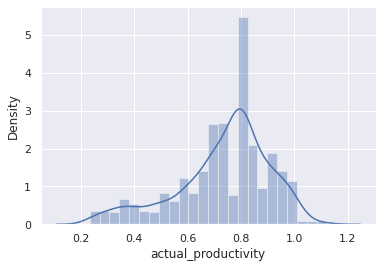

In [ ]:
import seaborn as sns
sns.distplot(data.actual_productivity)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

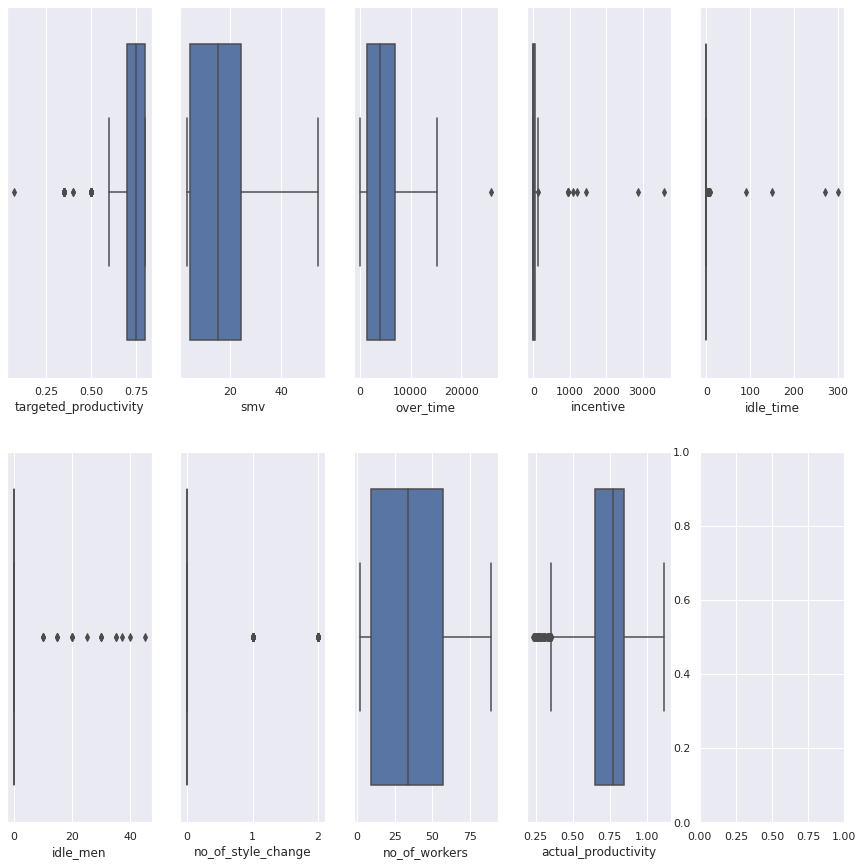

In [ ]:
#set seaborn plotting aesthetics as default
sns.set()

fig, axes = plt.subplots(2,5,figsize=(15, 15))
#plt.subplot(551)
sns.boxplot(datanew['targeted_productivity'],ax=axes[0,0])
#plt.subplot(552)
sns.boxplot(datanew['smv'],ax=axes[0,1])
#plt.subplot(553)
sns.boxplot(datanew['over_time'],ax=axes[0,2])
#plt.subplot(554)
sns.boxplot(datanew['incentive'],ax=axes[0,3])
#plt.subplot(555)
sns.boxplot(datanew['idle_time'],ax=axes[0,4])
#plt.subplot(556)
sns.boxplot(datanew['idle_men'],ax=axes[1,0])
#plt.subplot(557)
sns.boxplot(datanew['no_of_style_change'],ax=axes[1,1])
#plt.subplot(558)
sns.boxplot(datanew['no_of_workers'],ax=axes[1,2])
#plt.subplot(559)
sns.boxplot(datanew['actual_productivity'],ax=axes[1,3])

In [ ]:
def find_outlier(data=None, feature=None, mode='z-score'):
    "Parameters"
    "----------"
    "data : <pandas DataFrame>"
    "mode : <option> (z-score, std, iqr)"

    if mode == 'z-score':
        data['z_score'] = (data[feature] - data[feature].mean()) / data[feature].std()
        return data['z_score']
    elif mode == 'std':
        upper_limit = data[feature].mean() + 3 * data[feature].std()
        lower_limit = data[feature].mean() - 3 * data[feature].std()
        outlier = {'upper':upper_limit, 'lower':lower_limit}
        return outlier
    elif mode == 'iqr':
        q1= data[feature].quantile(0.25)
        q3 = data[feature].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr
        outlier = {'upper':upper_limit, 'lower':lower_limit}
        return outlier
    else:
        print('[WARNING] please select mode (z-score, std or iqr) !!!')
        return None

In [ ]:
num_vars_2=datanew.iloc[:,[5,6,7,8,9,10,11,12,13]]
num_vars_2=num_vars_2.columns.values.tolist()
num_vars_2

['targeted_productivity',
 'smv',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'actual_productivity']

In [ ]:
result_cek = []
for col in num_vars_2:
    min_value = datanew[col].min()
    max_value = datanew[col].max()

    Q1 = np.percentile(datanew[col], 25, interpolation = 'midpoint')
    Q3 = np.percentile(datanew[col], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1

    limit_low = Q1 - 1.5*IQR
    limit_up = Q3 + 1.5*IQR

    if min_value < limit_low or max_value > limit_up:
        result_cek.append('Exist')
    else:
        result_cek.append('Not Exist')

df_cek_outlier = pd.DataFrame({
    'Variable' : num_vars_2,
    'Outlier Check' : result_cek
}).sort_values(by='Outlier Check')

df_cek_outlier

,Variable,Outlier Check
0,targeted_productivity,Exist
2,over_time,Exist
3,incentive,Exist
4,idle_time,Exist
5,idle_men,Exist
6,no_of_style_change,Exist
8,actual_productivity,Exist
1,smv,Not Exist
7,no_of_workers,Not Exist


In [ ]:
outlier_vars = df_cek_outlier[df_cek_outlier['Outlier Check'] == 'Exist']['Variable'].to_list()

In [ ]:
for col in outlier_vars:
    outlier = find_outlier(datanew, col, 'iqr')
    lower = outlier['lower']
    upper = outlier['upper']
    datanew[col] = np.where(datanew[col] < lower, lower, datanew[col])
    datanew[col] = np.where(datanew[col] > upper, upper, datanew[col])


In [ ]:
datanew['targeted_productivity'].describe()

count    1197.000000
mean        0.736842
std         0.075515
min         0.550000
25%         0.700000
50%         0.750000
75%         0.800000
max         0.800000
Name: targeted_productivity, dtype: float64

In [ ]:
y = datanew[['actual_productivity']]

In [ ]:
x = datanew.drop(columns = ['actual_productivity','date','quarter','department','day','month','year'])

In [ ]:
 from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [ ]:
x.isnull().sum()

team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
dtype: int64

In [ ]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
model = LinearRegression()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.coef_
model.coef_

array([[-9.35070817e-03,  8.31454375e-01, -6.40758352e-03,
        -8.85806016e-07,  1.83920075e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.11897172e-03]])

In [ ]:
x = datanew.drop(columns = ['actual_productivity','date','quarter','department','day','month','year'])

In [ ]:
features = {
    "f1": u"team",
    "f2": u"targeted_productivity",
    "f3": u"smv",
    "f4": u"over_time",
    "f5": u"incentive",
    "f6": u"idle_time",
    "f7": u"idle_men",
    "f8": u"no_of_style_change",
    "f9": u"no_of_workers",
}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Feature ranking:
1. targeted_productivity 0.275306 
2. smv 0.180712 
3. incentive 0.157343 
4. over_time 0.134228 
5. no_of_workers 0.128722 
6. team 0.123689 
7. no_of_style_change 0.000000 
8. idle_men 0.000000 
9. idle_time 0.000000 


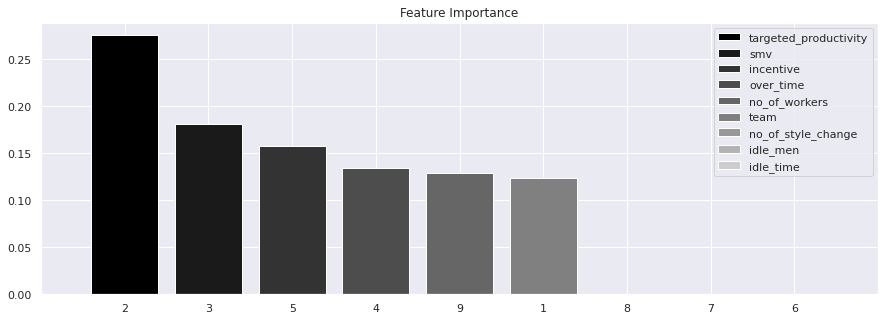

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000, max_features=9, random_state=0)

forest.fit(x, y)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = 9
feature_indices = [ind + 1 for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print(
        "%d. %s %f "
        % (f + 1, features["f" + str(feature_indices[f])], importances[indices[f]])
    )
plt.figure(figsize=(15, 5))
plt.title(u"Feature Importance")
bars = plt.bar(
    range(num_to_plot),
    importances[indices[:num_to_plot]],
    color=([str(i / float(num_to_plot + 1)) for i in range(num_to_plot)]),
    align="center",
)
ticks = plt.xticks(range(num_to_plot), feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u"".join(features["f" + str(i)]) for i in feature_indices]);

In [ ]:
 from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [ ]:
x.isnull().sum()

team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
dtype: int64

In [ ]:
numeric_col = [0,1]
KBins_col = [2]
Bina_col = [3,4,8]

In [ ]:
from sklearn.preprocessing import OneHotEncoder,PowerTransformer,KBinsDiscretizer,Binarizer
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn import set_config
trans = make_column_transformer((PowerTransformer(),numeric_col),
                                (KBinsDiscretizer(),KBins_col),
                                (Binarizer(threshold = 55),Bina_col),
                                remainder = 'passthrough')
set_config(display = 'diagram')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('powertransformer', PowerTransformer(),
                                 [0, 1]),
                                ('kbinsdiscretizer', KBinsDiscretizer(), [2]),
                                ('binarizer', Binarizer(threshold=55),
                                 [3, 4, 8])])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
algorithm = LinearRegression()
pipe = make_pipeline(trans,algorithm)

In [ ]:
algorithm

LinearRegression()

In [ ]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('powertransformer',
                                                  PowerTransformer(), [0, 1]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [2]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [3, 4, 8])])),
                ('linearregression', LinearRegression())])

In [ ]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.pipeline import make_pipeline
algorithm_1 = Lasso()
algorithm_2 = Ridge()
pipe_1 = make_pipeline(trans,algorithm_1)
pipe_2 = make_pipeline(trans,algorithm_2)

In [ ]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('powertransformer',
                                                  PowerTransformer(), [0, 1]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [2]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [3, 4, 8])])),
                ('linearregression', LinearRegression())])

In [ ]:
pipe_1.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('powertransformer',
                                                  PowerTransformer(), [0, 1]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [2]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [3, 4, 8])])),
                ('lasso', Lasso())])

In [ ]:
pipe_2.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('powertransformer',
                                                  PowerTransformer(), [0, 1]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [2]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [3, 4, 8])])),
                ('ridge', Ridge())])

In [ ]:
pred = pipe.predict(x_test)
pred

In [ ]:
pred_1 = pipe_1.predict(x_test)
pred_1

In [ ]:
pred_2 = pipe_2.predict(x_test)
pred_2

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred,y_test)

0.01688220612389951

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred_1,y_test)

0.02891672182787684

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred_2,y_test)

0.016894586674816515

In [ ]:
algorithm.coef_

array([[-0.01807182,  0.05008154, -0.03640343,  0.10532277,  0.02646881,
        -0.02751819, -0.06786996, -0.00045843,  0.11627938,  0.05702188,
         0.        ,  0.        ,  0.        ]])

In [ ]:
algorithm_2.coef_

array([[-0.01816004,  0.05024269, -0.03730572,  0.10350256,  0.02560536,
        -0.02586543, -0.06593677, -0.00141434,  0.11496285,  0.05431646,
         0.        ,  0.        ,  0.        ]])

In [ ]:
algorithm.intercept_

array([0.67978132])

In [ ]:
algorithm_1.intercept_

array([0.73482536])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
model_D = DecisionTreeRegressor(criterion = 'friedman_mse',max_features = 'sqrt')
pipe_D = make_pipeline(trans,model_D)

In [ ]:
model_D

DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt')

In [ ]:
pipe_D.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('powertransformer',
                                                  PowerTransformer(), [0, 1]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [2]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [3, 4, 8])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(criterion='friedman_mse',
                                       max_features='sqrt'))])

In [ ]:
pred_D = pipe_D.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred_D,y_test)

0.01908194590675299

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
algorithm4 = DecisionTreeRegressor()
algorithm5 = SVR()
algorithm6 = LinearRegression()
model_v = VotingRegressor(estimators = [('x4',algorithm4),('x5',algorithm5),('x6',algorithm6)],verbose = True)
model_v

VotingRegressor(estimators=[('x4', DecisionTreeRegressor()), ('x5', SVR()),
                            ('x6', LinearRegression())],
                verbose=True)

In [ ]:
from sklearn.pipeline import make_pipeline
pipe_v = make_pipeline(trans,model_v)
pipe_v

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('powertransformer',
                                                  PowerTransformer(), [0, 1]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [2]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [3, 4, 8])])),
                ('votingregressor',
                 VotingRegressor(estimators=[('x4', DecisionTreeRegressor()),
                                             ('x5', SVR()),
                                             ('x6', LinearRegression())],
                                 verbose=True))])

In [ ]:
pipe_v.fit(x_train,y_train)

[Voting] ....................... (1 of 3) Processing x4, total=   0.0s
[Voting] ....................... (2 of 3) Processing x5, total=   0.0s
[Voting] ....................... (3 of 3) Processing x6, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('powertransformer',
                                                  PowerTransformer(), [0, 1]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [2]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [3, 4, 8])])),
                ('votingregressor',
                 VotingRegressor(estimators=[('x4', DecisionTreeRegressor()),
                                             ('x5', SVR()),
                                             ('x6', LinearRegression())],
                                 verbose=True))])

In [ ]:
pred_v = pipe_v.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred_v,y_test)

0.015321919582052614

In [ ]:
from sklearn.svm import SVR                                                           # from sklearn.linear_model import LinearRegression                                                                            # from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor                                         # algorithm7 = DecisionTreeRegressor()
algorithm8 = SVR()                                                                    # algorithm9 = LinearRegression()
model_B = BaggingRegressor(base_estimator = SVR())
model_B

BaggingRegressor(base_estimator=SVR())

In [ ]:
pipe_B = make_pipeline(trans,model_B)
pipe_B

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('powertransformer',
                                                  PowerTransformer(), [0, 1]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [2]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [3, 4, 8])])),
                ('baggingregressor', BaggingRegressor(base_estimator=SVR()))])

In [ ]:
pipe_B.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('powertransformer',
                                                  PowerTransformer(), [0, 1]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [2]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [3, 4, 8])])),
                ('baggingregressor', BaggingRegressor(base_estimator=SVR()))])

In [ ]:
pred_B = pipe_B.predict(x_test)

In [ ]:
mean_squared_error(pred_B,y_test)

0.01623450189388459

In [ ]:
from sklearn.ensemble import RandomForestRegressor
algorithm9 = RandomForestRegressor()
algorithm10 = SVR()
model_vi = VotingRegressor(estimators = [('x9',algorithm9),('x10',algorithm10)],verbose = True)
model_vi

VotingRegressor(estimators=[('x9', RandomForestRegressor()), ('x10', SVR())],
                verbose=True)

In [ ]:
pipe_vi = make_pipeline(trans,model_vi)
pipe_vi

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('powertransformer',
                                                  PowerTransformer(), [0, 1]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [2]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [3, 4, 8])])),
                ('votingregressor',
                 VotingRegressor(estimators=[('x9', RandomForestRegressor()),
                                             ('x10', SVR())],
                                 verbose=True))])

In [ ]:
pipe_vi.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Voting] ....................... (1 of 2) Processing x9, total=   0.2s
[Voting] ...................... (2 of 2) Processing x10, total=   0.0s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('powertransformer',
                                                  PowerTransformer(), [0, 1]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [2]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [3, 4, 8])])),
                ('votingregressor',
                 VotingRegressor(estimators=[('x9', RandomForestRegressor()),
                                             ('x10', SVR())],
                                 verbose=True))])

In [ ]:
pred_vi = pipe_vi.predict(x_test)

In [ ]:
mean_squared_error(pred_vi,y_test)

0.015503370240228518